<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dimensionality-reduction-Using-PCA" data-toc-modified-id="Dimensionality-reduction-Using-PCA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dimensionality reduction Using PCA</a></span></li><li><span><a href="#Feature-Extraction-on-Diabetes-dataset" data-toc-modified-id="Feature-Extraction-on-Diabetes-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Feature Extraction on Diabetes dataset</a></span><ul class="toc-item"><li><span><a href="#ACcuracy-Before-applying-PCA" data-toc-modified-id="ACcuracy-Before-applying-PCA-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>ACcuracy Before applying PCA</a></span></li></ul></li><li><span><a href="#On-Mnist-Dataset" data-toc-modified-id="On-Mnist-Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>On Mnist Dataset</a></span></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Dimensionality reduction Using PCA

In [3]:
class PCA:
    
    def __init__(self, n_component, solver="svd"):
        self.n_component = n_component
        self.solver=solver
        self.components = None
        self.mean = None
        
        
    def fit(self, X):
        self.mean = X.mean(axis=0)
        X = X - self.mean
        
        # expects row=feature, column=sample          
        # cov = np.cov(X.T)
        cov = (X - X.mean(axis=0)).T.dot(X - X.mean(axis=0)) / (X.shape[0] - 1)
        
        
        if self.solver == "eig":
            #  eigenvalue[i] -> eigenvector[:, i]
            eigenvalues, eigenvectors = np.linalg.eig(cov)
            
            eigenvectors = eigenvectors.T
            
            idxs = np.argsort(eigenvalues)[::-1]
            eigenvalues = eigenvalues[idxs]
            eigenvectors = eigenvectors[idxs]
            
            self.components = eigenvectors[0:self.n_component]
        
        
        else:          
            # SVD
            _, S, Vt = np.linalg.svd(X)
            idxs = np.argsort(S)[::-1]
            
            S = S[idxs]
            Vt = Vt[idxs]
            
            self.components = Vt[0:self.n_component]
        
    
    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

# Feature Extraction on Diabetes dataset

In [4]:
diabetes_data = pd.read_csv(r'../datasets/diabetes_data.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
X = diabetes_data[diabetes_data.columns[:-1]].values
y = diabetes_data[diabetes_data.columns[-1]].values

## ACcuracy Before applying PCA

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [7]:
# using Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Before feature extraction")
print(f"Number of features of X: {X_train.shape[1]}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Before feature extraction
Number of features of X: 8
Accuracy: 0.7142857142857143


In [8]:
# Transforming Dataset

pca = PCA(n_component=6)
X_transformed = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, stratify=y, random_state=42)

In [9]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("After feature extraction")
print(f"Number of features of X: {X_train.shape[1]}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

After feature extraction
Number of features of X: 6
Accuracy: 0.7337662337662337


# On Mnist Dataset

Reducing number of features for visualization

In [10]:
data = load_iris()
X = data.data
y = data.target

In [11]:
pca = PCA(n_component=2)
X_projected = pca.fit_transform(X)

In [12]:
print(f"Shape of X: {X.shape}")
print(f"Shape of transformed X: {X_projected.shape}")

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


In [13]:
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

In [14]:
X_trans = np.c_[x1, x2, y]
X_trans.shape

(150, 3)

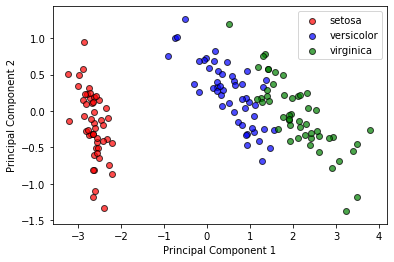

In [15]:
colors = ["red", "blue", "green"]
for i in range(3):
    plt.scatter(X_trans[X_trans[:, 2] == i][:, 0], X_trans[X_trans[:, 2] == i][:, 1], c=colors[i], 
                edgecolors="k", alpha=0.7, label=data.target_names[i])

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()